# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [3]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\SEBI\AppData\Local\Temp\ipykernel_23048\3936888326.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


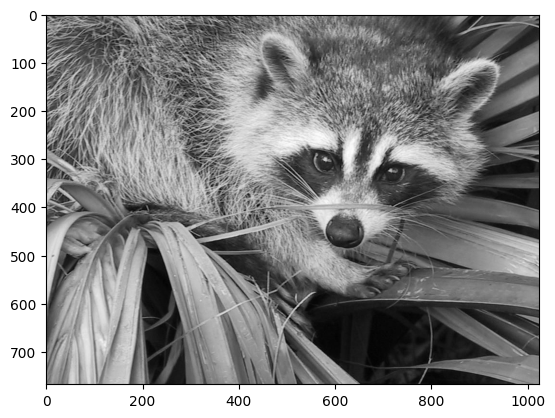

In [5]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

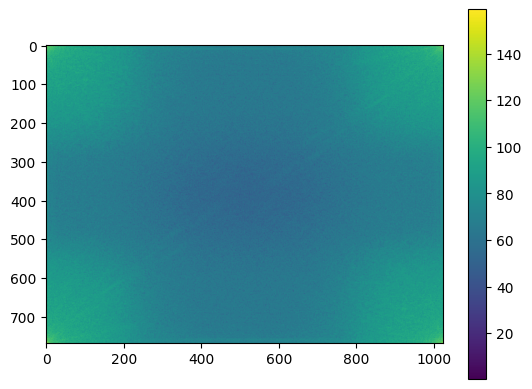

In [6]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

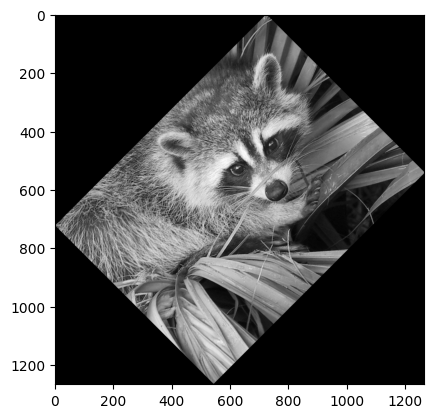

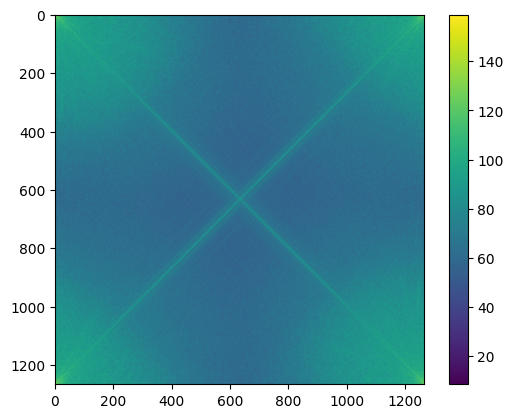

In [7]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

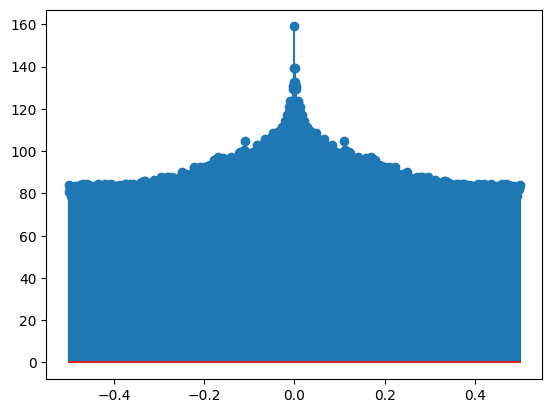

In [8]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

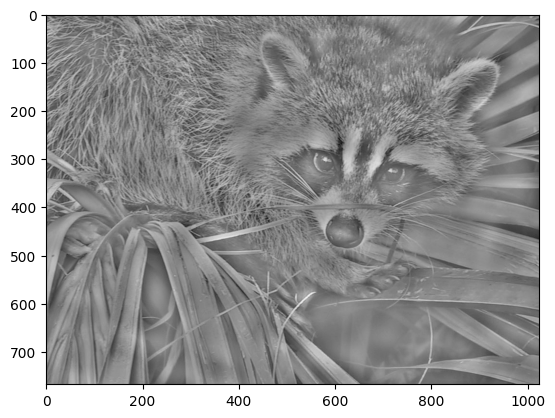

In [9]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

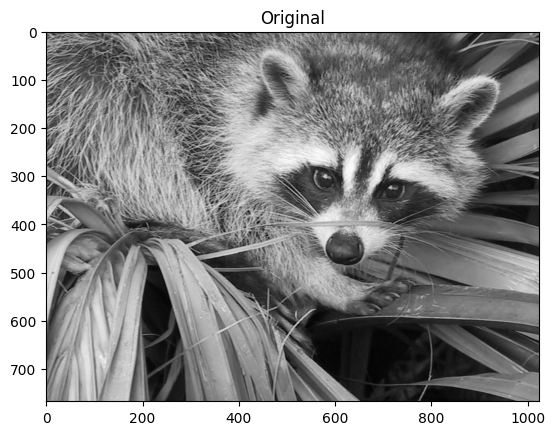

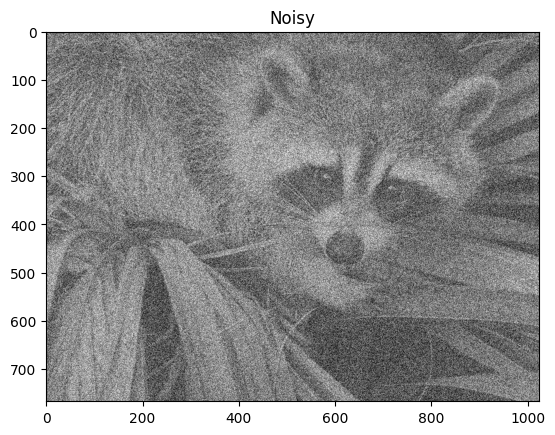

In [10]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

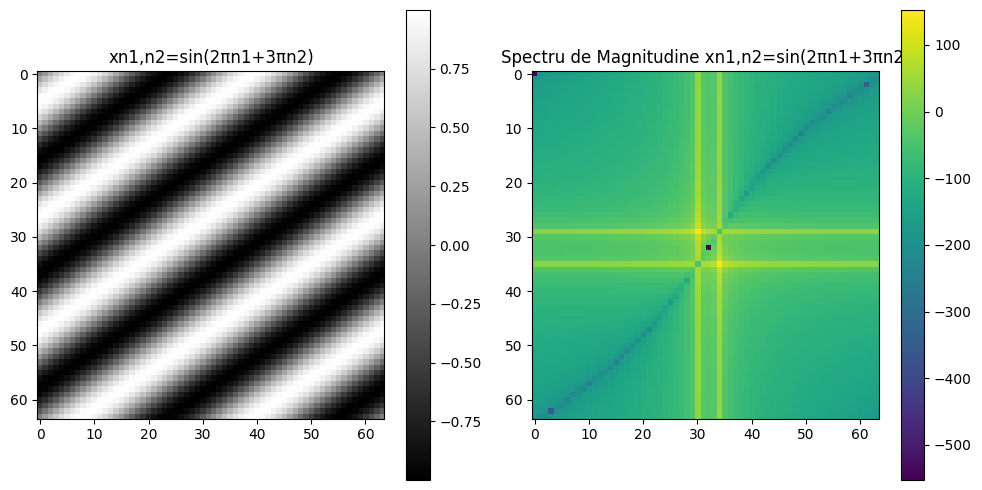

In [11]:
N1, N2 = 64, 64

n1, n2 = np.meshgrid(np.linspace(0, 2, N1), np.linspace(0, 2, N2))

xn1_n2_updated = np.sin(2 * np.pi * n1 + 3 * np.pi * n2)
Ym1_m2_updated = np.fft.fft2(xn1_n2_updated)

Ym1_m2_shifted_updated = np.fft.fftshift(Ym1_m2_updated)
magnitude_spectrum_updated = 20 * np.log(np.abs(Ym1_m2_shifted_updated) + 1e-12)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("xn1,n2=sin(2πn1+3πn2)")
plt.imshow(xn1_n2_updated, cmap='gray')  
plt.colorbar() 

plt.subplot(1, 2, 2)
plt.title("Spectru de Magnitudine xn1,n2=sin(2πn1+3πn2)")
plt.imshow(magnitude_spectrum_updated, cmap='viridis')  
plt.colorbar()   

plt.tight_layout()
plt.show()
# aici putem observa cum indicii celor 2 componente influenteaza
# informatia finala, astfel generand un unghi de inclinare diferit
# daca unul dintre cei 2 indici ar fi fost 2 => am fi avut oscilatii verticale sau oriizontale
# si frecventa ar fi fost doar o linie in spectrul de magnitudine
# in spectrul de magnitudine putem observa ca avem 2 componente, una cu frecventa 2 si una cu frecventa 3
# chiar daca pare ca sunt 4 linii, trb sa tinem cont de simetria componentelor


[[ 1.          1.3884348   1.71586685 ...  0.28413315  0.6115652
   1.        ]
 [ 0.82623877  1.21467357  1.54210562 ...  0.11037193  0.43780398
   0.82623877]
 [ 0.36534102  0.75377582  1.08120787 ... -0.35052582 -0.02309377
   0.36534102]
 ...
 [ 0.36534102  0.75377582  1.08120787 ... -0.35052582 -0.02309377
   0.36534102]
 [ 0.82623877  1.21467357  1.54210562 ...  0.11037193  0.43780398
   0.82623877]
 [ 1.          1.3884348   1.71586685 ...  0.28413315  0.6115652
   1.        ]]


C:\Users\SEBI\AppData\Local\Temp\ipykernel_23048\2962626829.py:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_updated = 20 * np.log(np.abs(Ym1_m2_shifted_updated))


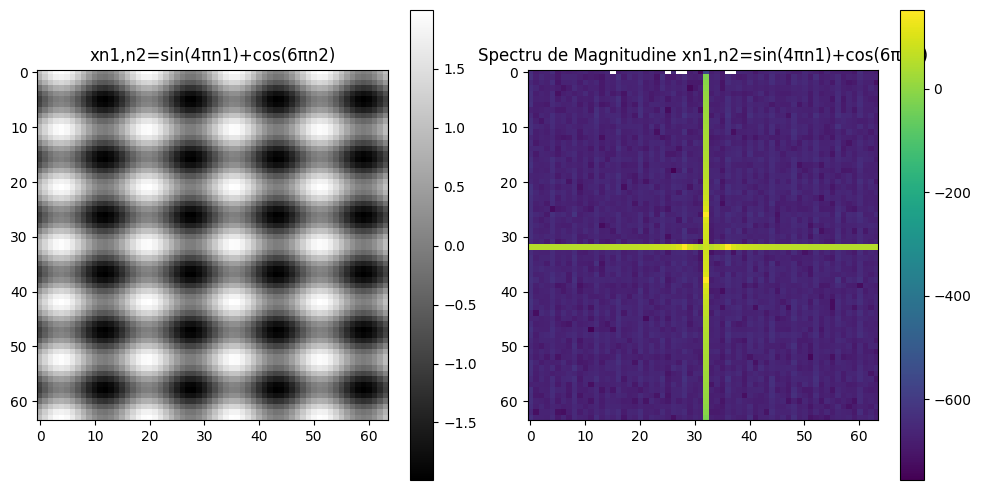

In [12]:
n1, n2 = np.meshgrid(np.linspace(0, 2, N1), np.linspace(0, 2, N2))

xn1_n2_updated = np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)
Ym1_m2_updated = np.fft.fft2(xn1_n2_updated)

print(xn1_n2_updated)
Ym1_m2_shifted_updated = np.fft.fftshift(Ym1_m2_updated)

magnitude_spectrum_updated = 20 * np.log(np.abs(Ym1_m2_shifted_updated))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("xn1,n2=sin(4πn1)+cos(6πn2)")
plt.imshow(xn1_n2_updated, cmap='gray')  
plt.colorbar() 

plt.subplot(1, 2, 2)
plt.title("Spectru de Magnitudine xn1,n2=sin(4πn1)+cos(6πn2)")
plt.imshow(magnitude_spectrum_updated, cmap='viridis')  
plt.colorbar()   

plt.tight_layout()
plt.show()
# observam cum informatia oscileaza atat pe randuri cand si pe coloane
# periodicitatea ei intalnindu-se in anumite puncte



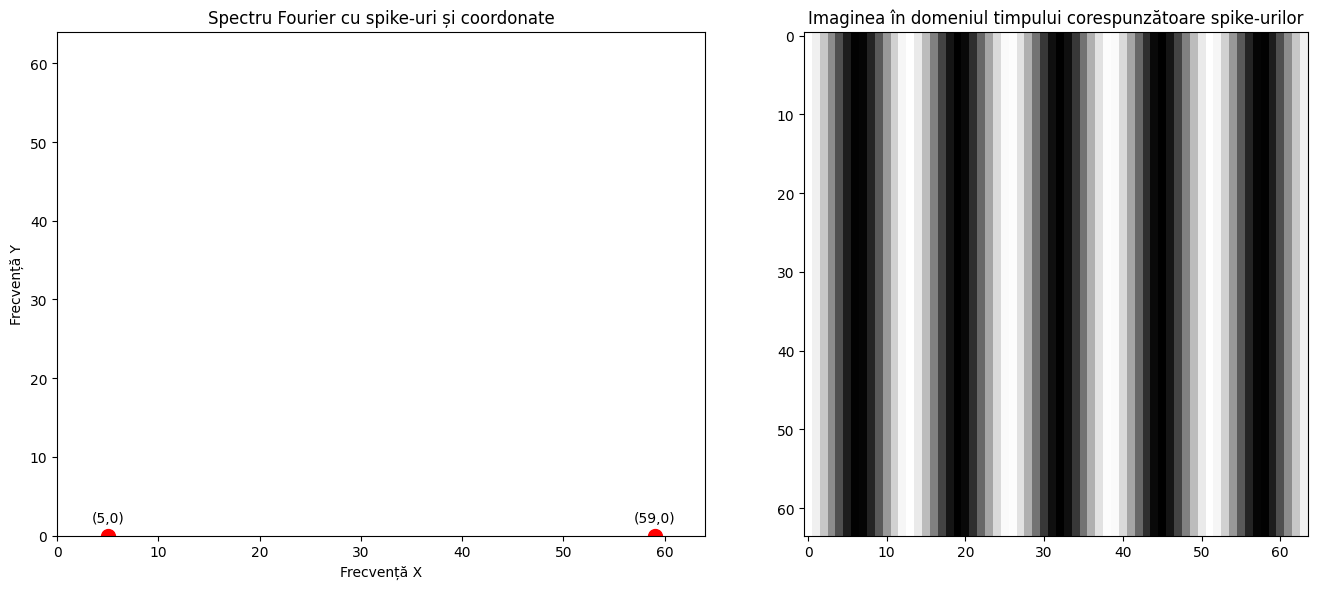

In [13]:
# in acest exercitiu avem informatia in domeniul frecventa si
# trebuie sa o transformam in domeniul timpului
Y_scatter_horizontal = np.zeros((N1, N2), dtype=complex)
Y_scatter_horizontal[0, 5] = 1
Y_scatter_horizontal[0, N2 - 5] = 1

X_scatter_horizontal = np.fft.ifft2(Y_scatter_horizontal).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_x_horizontal = [5, N2-5]
points_y_horizontal = [0, 0]

# Afișăm spike-urile folosind 'scatter' pentru spectrul Fourier și adăugăm coordonatele
# deoarce acestea nu sunt vizibile în mod clar în imaginea de mai jos
# daca am folosit un colormap
axes[0].scatter(points_x_horizontal, points_y_horizontal, color='red', s=100)
for i, txt in enumerate(points_x_horizontal):
    axes[0].annotate(f"({txt},{points_y_horizontal[i]})", (points_x_horizontal[i], points_y_horizontal[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectru Fourier cu spike-uri și coordonate')
axes[0].set_xlabel('Frecvență X')
axes[0].set_ylabel('Frecvență Y')

axes[1].imshow(X_scatter_horizontal, cmap='gray')
axes[1].set_title('Imaginea în domeniul timpului corespunzătoare spike-urilor')

plt.tight_layout()
plt.show()


# Explicație
# Y[0,5] reprezintă componenta de frecvență de-a lungul axei orizontale a imaginii. Si Y[0, N2-5] este doar conjugatul lui Y[0,5].
# In fourier componente DFT Y[K]=Y[N-K]*
# Indicele 0 pentru prima coordonată indică faptul că nu există nicio variație pe axa verticală (de-a lungul coloanelor imaginii).
# Cu alte cuvinte, nu există nicio oscilație pe acea direcție.
# Indicele 5 pentru a doua coordonată indică faptul că frecvența pe axa orizontală (de-a lungul rândurilor imaginii)
# are 5 cicluri complete pe întreaga lățime a imaginii.

# În domeniul spațial, Y[0,5] va produce o serie de benzi verticale care se repetă de 5 ori pe lățimea întregii imagini.
# Fiecare bandă reprezintă o creștere și o scădere completă (un ciclu) a valorii pixelului de la întuneric la lumină și înapoi.


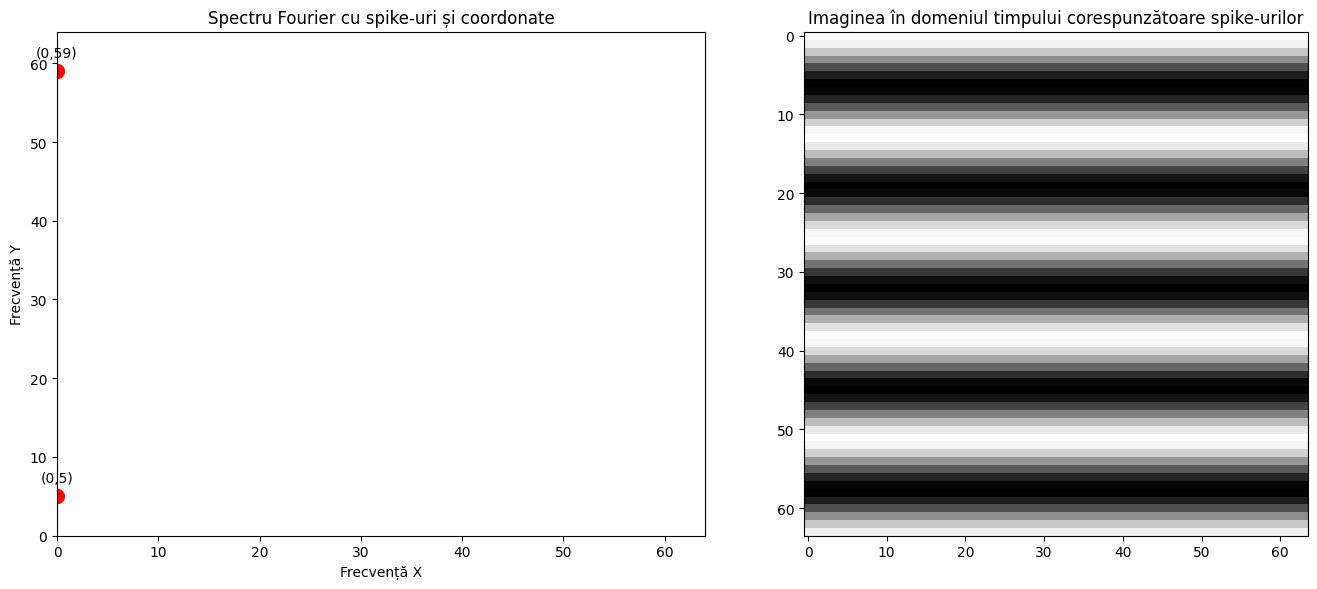

In [14]:
Y_new_vertical = np.zeros((N1, N2), dtype=complex)
Y_new_vertical[5, 0] = 1
Y_new_vertical[N2 - 5, 0] = 1

X_new_vertical = np.fft.ifft2(Y_new_vertical).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_y_vertical = [5, N2-5]
points_x_vertical = [0, 0]

axes[0].scatter(points_x_vertical, points_y_vertical, color='red', s=100)
for i, txt in enumerate(points_y_vertical):
    axes[0].annotate(f"({points_x_vertical[i]},{txt})", (points_x_vertical[i], points_y_vertical[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectru Fourier cu spike-uri și coordonate')
axes[0].set_xlabel('Frecvență X')
axes[0].set_ylabel('Frecvență Y')

axes[1].imshow(X_new_vertical, cmap='gray')
axes[1].set_title('Imaginea în domeniul timpului corespunzătoare spike-urilor')

plt.tight_layout()
plt.show()

# Comentariu pentru noul spectru
# Y[5,0] și Y[N-5,0] reprezintă componente de frecvență de-a lungul axei verticale a imaginii.
# Indicii 5 și N-5 pentru prima coordonată indică faptul că există variații pe axa verticală (de-a lungul coloanelor imaginii)
# cu 5 cicluri complete pe întreaga înălțime a imaginii. În domeniul spațial, aceasta va produce o serie de benzi orizontale
# care se repetă de 5 ori pe înălțimea întregii imagini.


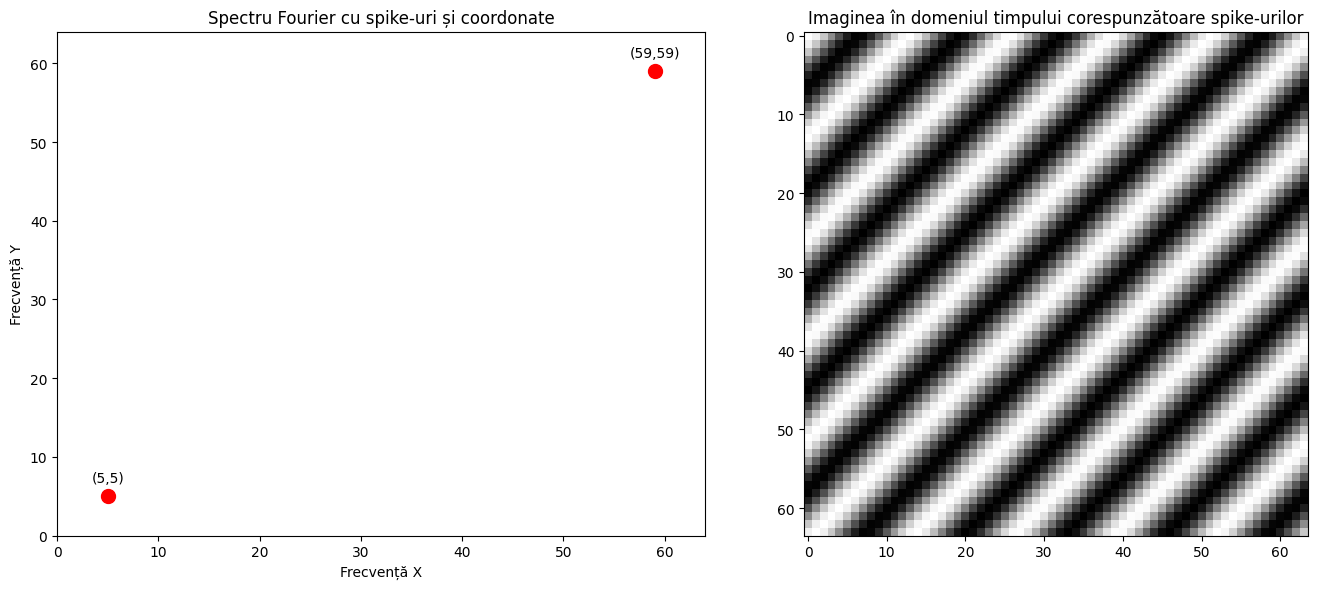

In [15]:
# Inițializăm spectrul Y pentru noile condiții, unde Y[5,5] și Y[N-5,N-5] sunt setate la 1
Y_new_55 = np.zeros((N1, N2), dtype=complex)
Y_new_55[5, 5] = 1
Y_new_55[N1 - 5, N2 - 5] = 1

X_new_55 = np.fft.ifft2(Y_new_55).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_x = [5, N2-5]
points_y = [5, N2-5]

axes[0].scatter(points_x, points_y, color='red', s=100)
for i, txt in enumerate(points_x):
    axes[0].annotate(f"({txt},{points_y[i]})", (points_x[i], points_y[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectru Fourier cu spike-uri și coordonate')
axes[0].set_xlabel('Frecvență X')
axes[0].set_ylabel('Frecvență Y')

axes[1].imshow(X_new_55, cmap='gray')
axes[1].set_title('Imaginea în domeniul timpului corespunzătoare spike-urilor')

plt.tight_layout()
plt.show()
# Aici este o combinație a celor două cazuri anterioare. Astfel incat
# pixelii de pe axa orizontală și verticală sunt afectați de aceste spike-uri.

C:\Users\SEBI\AppData\Local\Temp\ipykernel_23048\113843807.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


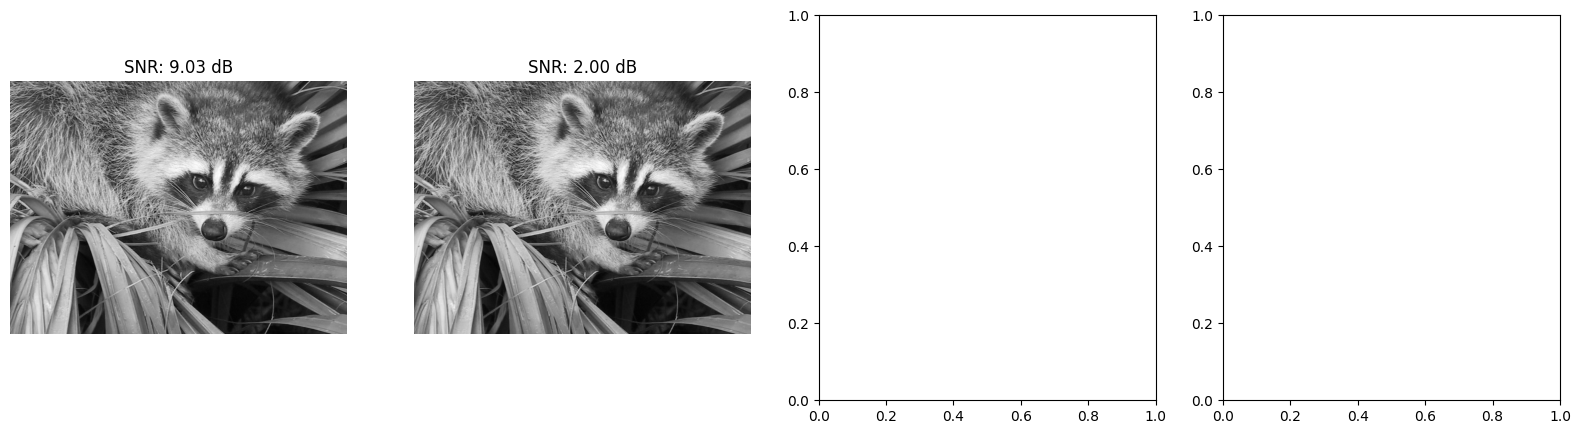

In [20]:

## nu este facut corect ar trb frecventele din colturi
## componente anumite 
X = misc.face(gray=True)

Y = np.fft.fft2(X)
Y_shifted = np.fft.fftshift(Y)  
# Prin centrarea spectrului, aducem componenta de frecvență zero în centrul spectrului.
# Aceasta face ca spectrul să fie mai intuitiv de înțeles, deoarece frecvențele joase
# sunt acum în centru, iar frecvențele înalte se extind spre margini.
power_spectrum = np.abs(Y_shifted)**2

# Signal-to-Noise Ratio - raportul intre cele 2 puteri in log
signal_power = np.sum(power_spectrum)
noise_power = np.sum(power_spectrum[power_spectrum < np.mean(power_spectrum)])
current_SNR = 10 * np.log10(8)

# Am selectat un array de 4 valori SNR dorite doar ca sa pot compara mai usor
desired_SNR_values = [current_SNR, 2] 

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for idx, desired_SNR in enumerate(desired_SNR_values):
    Y_shifted_copy = Y_shifted.copy()
    for i in range(Y_shifted_copy.shape[0]):
        for j in range(Y_shifted_copy.shape[1]):
            if 10 * np.log10(power_spectrum[i, j]) < desired_SNR:
                Y_shifted_copy[i, j] = 0

    # Aplicarea transformatei Fourier inverse pentru a obține imaginea comprimată
    Y_shifted_copy = np.fft.ifftshift(Y_shifted_copy)  # Decentrarea spectrului
    X_compressed = np.fft.ifft2(Y_shifted_copy)
    X_compressed = np.real(X_compressed)  # Conversia la valori reale

    axs[idx].imshow(X_compressed, cmap=plt.cm.gray)
    axs[idx].set_title(f"SNR: {desired_SNR:.2f} dB")
    axs[idx].axis('off')

plt.show()


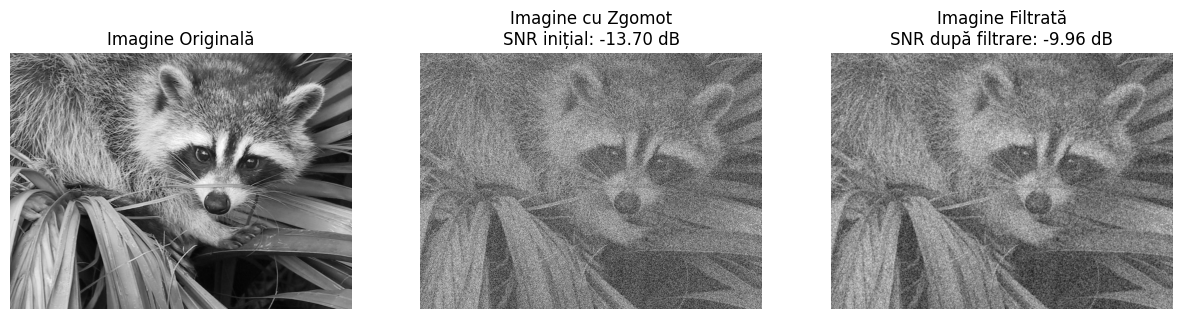

In [21]:
def calculate_SNR(image, noise):
    signal_power = np.sum(image ** 2)
    noise_power = np.sum(noise ** 2)
    SNR = 10 * np.log10(signal_power / noise_power)
    return SNR

SNR_before = calculate_SNR(X, noise)

# Eu am ales un filtru uniform
# Cred ca ar fi functionat si median_filter care folosea media vecinilor
# dar avnad in vedere ca nu cred ca noise are o frecventa mare
filtered_image = ndimage.uniform_filter(X_noisy, size=3)

noise_after_filter = X_noisy - filtered_image
SNR_after = calculate_SNR(X, noise_after_filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X, cmap=plt.cm.gray)
axs[0].set_title('Imagine Originală')
axs[0].axis('off')

axs[1].imshow(X_noisy, cmap=plt.cm.gray)
axs[1].set_title(f'Imagine cu Zgomot\nSNR inițial: {SNR_before:.2f} dB')
axs[1].axis('off')

axs[2].imshow(filtered_image, cmap=plt.cm.gray)
axs[2].set_title(f'Imagine Filtrată\nSNR după filtrare: {SNR_after:.2f} dB')
axs[2].axis('off')

plt.show()


C:\Users\SEBI\AppData\Local\Temp\ipykernel_23048\1548257053.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate_mix, data_mix = wavfile.read(file_path_mix)


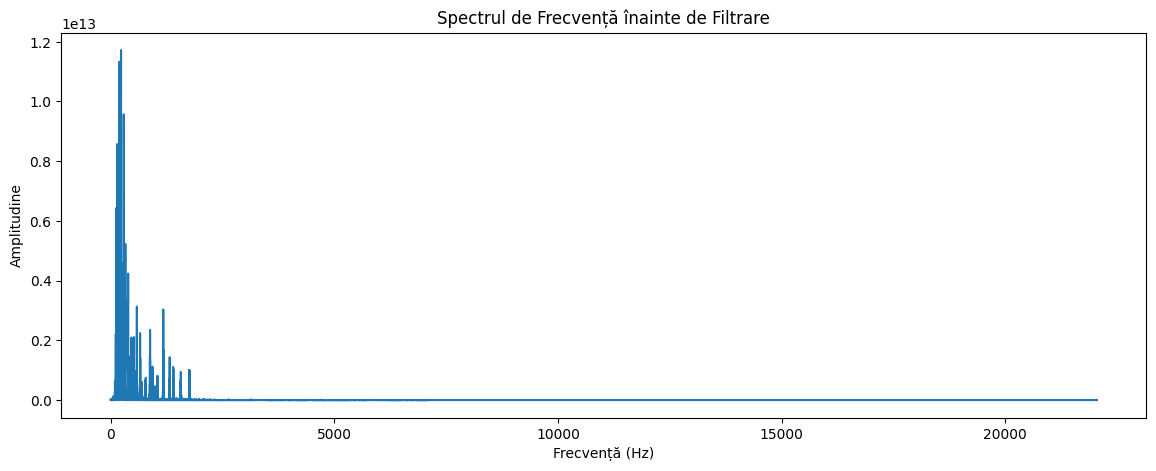

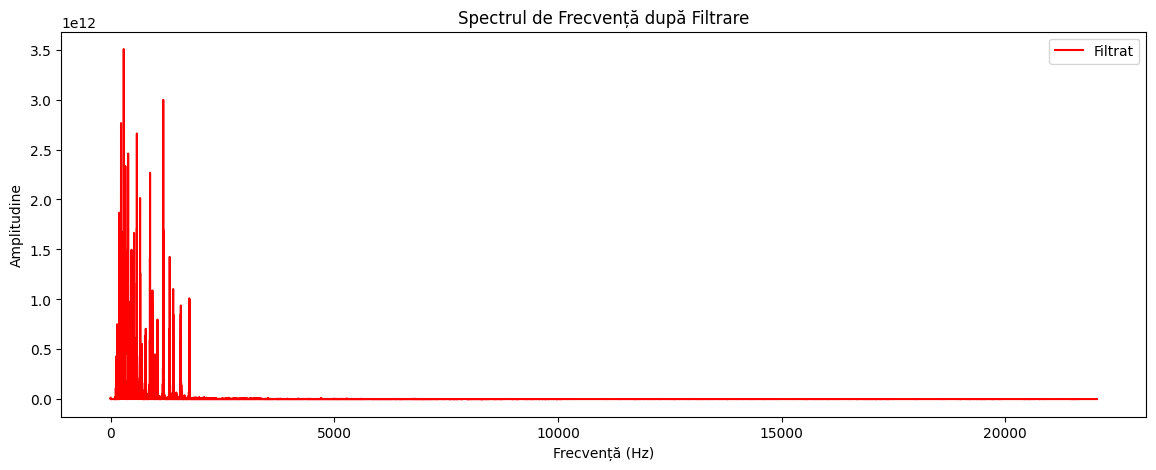

Fișierul audio mixt modificat a fost salvat ca: ps-lab-5-filtered.wav


In [22]:
# exercitiul acesta nu am reusit sa il fac
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, irfft
from scipy.signal import butter, sosfilt

file_path_mix = 'ps-lab-5-keyboard.wav'
sample_rate_mix, data_mix = wavfile.read(file_path_mix)

if len(data_mix.shape) == 2:
    data_mix = data_mix.mean(axis=1)

fft_data_mix = rfft(data_mix)
freqs_mix = np.fft.rfftfreq(len(data_mix), 1/sample_rate_mix)

plt.figure(figsize=(14, 5))
plt.plot(freqs_mix, np.abs(fft_data_mix))
plt.title("Spectrul de Frecvență înainte de Filtrare")
plt.xlabel("Frecvență (Hz)")
plt.ylabel("Amplitudine")
plt.show()

frecventa_centrala = 233.3420781857952  
bandwidth = 230  

lowcut = max(frecventa_centrala - bandwidth, 0)
highcut = min(frecventa_centrala + bandwidth, sample_rate_mix / 2 - 1)

if lowcut <= 0 or highcut >= sample_rate_mix / 2:
    raise ValueError("Frecvențele de tăiere trebuie să fie între 0 și Nyquist.")


sos = butter(2, [lowcut / (sample_rate_mix / 2), highcut / (sample_rate_mix / 2)], btype='bandstop', output='sos')
filtered_signal_mix = sosfilt(sos, data_mix)

normalized_filtered_signal_mix = np.int16(filtered_signal_mix / np.max(np.abs(filtered_signal_mix)) * 32767)

output_file_path_mix = 'ps-lab-5-filtered.wav'
wavfile.write(output_file_path_mix, sample_rate_mix, normalized_filtered_signal_mix)

fft_filtered_signal_mix = rfft(filtered_signal_mix)

plt.figure(figsize=(14, 5))
plt.plot(freqs_mix, np.abs(fft_filtered_signal_mix), label='Filtrat', color='red')
plt.title("Spectrul de Frecvență după Filtrare")
plt.xlabel("Frecvență (Hz)")
plt.ylabel("Amplitudine")
plt.legend()
plt.show()

print(f"Fișierul audio mixt modificat a fost salvat ca: {output_file_path_mix}")
